In [1]:
! pip install zarr s3fs
! pip install climetlab_s2s_ai_competition --quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.3.4
Climetlab-s2s-ai-competition plugin version : 0.3.4


# Using Zarr data

In [4]:
version = '0.1.20' # version of the data

In [5]:
import pandas as pd
date=pd.date_range(start="2020-01-02", end="2020-12-31", freq="w-thu")
#date = [d.strftime('%Y%m%d') for d in date]
date = [d.to_numpy() for d in date]

In [6]:
import numpy as np
date = [np.datetime64('2020-01-02'),'2020-01-09','20200116']
date

[numpy.datetime64('2020-01-02'), '2020-01-09', '20200116']

Let us get the zarr pointer to the data for realtime data. The "date" argument also accept lists of values.

In [16]:
rt_tp = cml.load_dataset("s2s-ai-competition-reference-set",
                         parameter='tp',
                         version=version,
                         #hindcast=True, 
                         format='zarr').to_xarray()
rt_tp

opening 1 urls


<xarray.Dataset>
Dimensions:        (forecast_time: 53, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    surface        (forecast_time) int64 dask.array<chunksize=(53,), meta=np.ndarray>
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(53, 47), meta=np.ndarray>
    tp             (forecast_time, realization, step, latitude, longitude) float32 dask.array<chunksize=(1, 48, 45, 121, 120), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-02-16T07:09:48 GRIB to CDM+CF via cfgrib-0....
    institution:             European Centre for Medium-Range Weather Forecasts

In [17]:
rt_2t = cml.load_dataset("s2s-ai-competition-reference-set",
                         parameter='2t',
                         version=version,
                         #hindcast=True, 
                         format='zarr').to_xarray()
rt_2t

opening 1 urls


<xarray.Dataset>
Dimensions:        (forecast_time: 53, latitude: 121, longitude: 240, realization: 51, step: 46)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
Data variables:
    t2m            (forecast_time, realization, step, latitude, longitude) float32 dask.array<chunksize=(1, 51, 23, 121, 120), meta=np.ndarray>
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(53, 46), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-02-15T16:18:08 GRIB to CDM+CF via cfgrib-0....
    institution:             European Centre for Medium-Range Weather Forecasts

Hindcast data would be retrieved with hindcast=True (but they have not been uploaded yet).

In [18]:
#hc_2t = cml.load_dataset("s2s-ai-competition-reference-set",
#                         parameter='2t',
#                         version='0.1.20',
#                         hindcast=True,
#                         format='zarr').to_xarray()

### Computing average and plotting

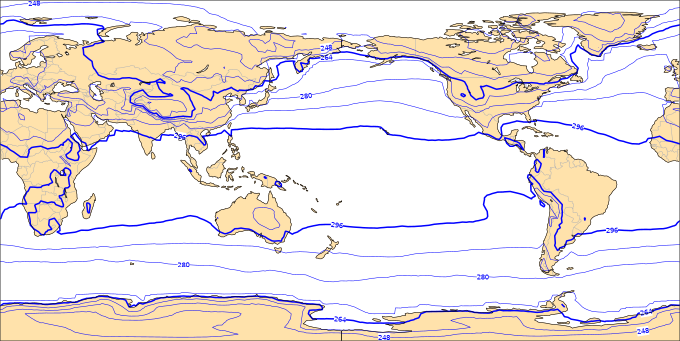

In [20]:
mean1 = rt_2t.mean(dim="step")
m1 = mean1.isel(forecast_time=0, realization=0).squeeze().compute()
cml.plot_map(m1)

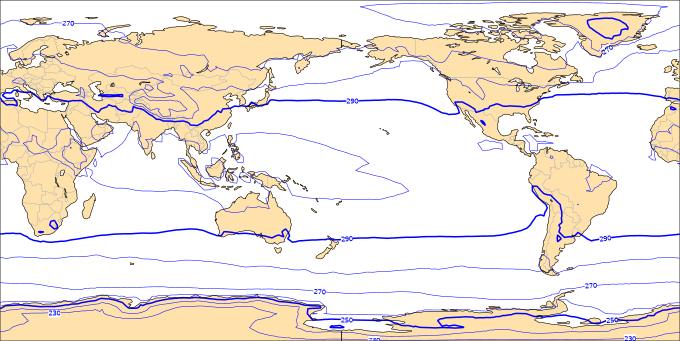

In [21]:
mean2 = rt_2t.mean(dim="forecast_time")
m2 = mean2.isel(step=20, realization=0).squeeze().compute()
cml.plot_map(m2)

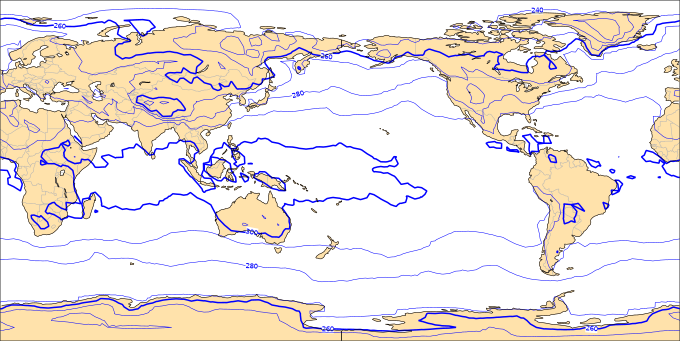

In [29]:
mean3 = rt_2t[['t2m','time']].groupby('time').mean()['t2m']
m3 = mean3.isel(realization=0, time=0).squeeze().compute()
cml.plot_map(m3)